**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [3]:
# Gerekli kütüphaneleri içe aktarıyoruz
import numpy as np  # Sayısal işlemler için NumPy kütüphanesi
import matplotlib.pyplot as plt  # Görselleştirme için Matplotlib
import seaborn as sns  # Daha gelişmiş görselleştirme için Seaborn
import cv2  # OpenCV kütüphanesi (görüntü işleme için)
from PIL import Image  # PIL kütüphanesi (görüntü işleme için)
import tensorflow as tf  # TensorFlow kütüphanesi (derin öğrenme için)
tf.random.set_seed(3)  # Rastgeleliği kontrol etmek için seed değeri belirleniyor
from tensorflow import keras  # TensorFlow içinde Keras kütüphanesi (sinir ağı modelleri için)
from keras.datasets import mnist  # MNIST veri setini Keras'tan içe aktarıyoruz
from tensorflow.math import confusion_matrix  # Karışıklık matrisi hesaplamak için

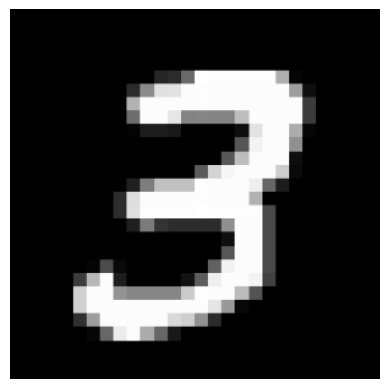

In [4]:
image = cv2.imread("MNIST_digit.png") 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off") 
plt.show()

Bu kodun amacı **bir görüntü dosyasını okuyup ekrana doğru renklerde göstermektir**.

### Adım adım basit açıklama:

1. **Görüntüyü oku:**  
   ```python
   image = cv2.imread("MNIST_digit.png")
   ```
   - `"MNIST_digit.png"` dosyasını bilgisayardan alıp kod içine yükler.
   - OpenCV bunu **BGR (mavi-yeşil-kırmızı) renk formatında** okur.

2. **Renkleri düzelt:**  
   ```python
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   ```
   - OpenCV'nin BGR formatını **RGB formatına** çevirir.
   - Çünkü **Matplotlib RGB formatında çalışır**. Bu dönüşüm yapılmazsa renkler yanlış görünebilir.

3. **Görüntüyü göster:**  
   ```python
   plt.imshow(image)
   plt.axis("off")  # Etrafındaki sayıları (x ve y eksenlerini) kaldırır.
   plt.show()
   ```
   - **Matplotlib kullanarak görüntüyü ekrana çizer.**  
   - Eksen çizgilerini kaldırır, böylece sadece görüntü görünür.

**Sonuç:**  
Kod, `"MNIST_digit.png"` adlı resmi **doğru renklerde ve eksensiz** bir şekilde ekranda gösterir.

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

**MNIST veri seti**, **el yazısıyla yazılmış 0-9 arasındaki rakamların farklı şekillerde yazılmış 70.000 örneğinden oluşur**. 

### **Neden Eğitim ve Test Olarak Ayrıldı?**
- **Eğitim Verisi (60.000 adet)** → Modelin rakamları tanımayı öğrenmesi için kullanılır.
- **Test Verisi (10.000 adet)** → Modelin öğrendiklerini test etmek için kullanılır.

Böylece model önce **farklı yazılmış rakamları öğrenir**, sonra yeni ve daha önce görmediği rakamlarla test edilir. **Amaç, modelin gerçek dünyada yeni el yazısı rakamlarını doğru tanıyıp tanımadığını kontrol etmektir.** 🚀

Bu kod, **el yazısı rakamları içeren MNIST veri setini yükler ve iki gruba ayırır: eğitim ve test verisi.**  

- `X_train` → **Eğitim için kullanılan 60.000 adet rakam görüntüsü**  
- `Y_train` → **Bu görüntülerin hangi rakam olduğunu gösteren etiketler (0-9 arası sayılar)**  
- `X_test` → **Test için kullanılan 10.000 adet yeni rakam görüntüsü**  
- `Y_test` → **Bu test görüntülerinin doğru etiketleri**

**Amaç:**  
📌 Model önce **X_train, Y_train** ile öğrenir, sonra **X_test, Y_test** ile doğruluğu test edilir.

In [6]:
print(type(X_train))  

<class 'numpy.ndarray'>


In [7]:
print("Eğitim verisi boyutu:", X_train.shape)  # (60000, 28, 28) -> 60.000 adet 28x28 boyutunda el yazısı rakamları
print("Eğitim etiketleri boyutu:", Y_train.shape)  # (60000,) -> 60.000 adet rakam etiketi
print("Test verisi boyutu:", X_test.shape)  # (10000, 28, 28) -> 10.000 adet 28x28 boyutunda test görüntüsü
print("Test etiketleri boyutu:", Y_test.shape)  # (10000,) -> 10.000 adet rakam etiketi

Eğitim verisi boyutu: (60000, 28, 28)
Eğitim etiketleri boyutu: (60000,)
Test verisi boyutu: (10000, 28, 28)
Test etiketleri boyutu: (10000,)


In [8]:
print(X_train[10]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25


Kod:  
```python
print(X_train[10])
```
Bu kod, **MNIST veri setindeki 10. rakamın bilgisayarda nasıl saklandığını** gösterir.

---

### **Çıktının Anlamı**
Çıktı, **28 satır ve 28 sütundan oluşan bir tablo (matris)**.  
Bu, **28x28 piksel boyutundaki bir görüntüye** karşılık gelir.  

- **0 olan yerler** → Boş alan (arka plan, siyah).  
- **Büyük sayılar (örneğin 254, 255)** → Rakamın olduğu yerler (beyaz veya gri).  
- **Orta değerler (örneğin 118, 171)** → Rakamın kenarları veya gölgeleri (gri tonları).  

Bu tablo, bilgisayarın **bir sayıyı rakam olarak nasıl sakladığını gösterir**.

---


**Özet:**  
Senin çıktın **bir resmin sayısal hali**. Bilgisayar, bir el yazısı rakamını **0 ile 255 arasında sayılarla temsil ediyor**.  
Eğer bu sayıları bir ekrana çizersek, **el yazısı rakamın görüntüsünü elde ederiz!** 📷

In [9]:
# 10. görüntünün boyutlarını yazdır (örneğin: (28,28) olmalı)
print(X_train[10].shape)  

(28, 28)


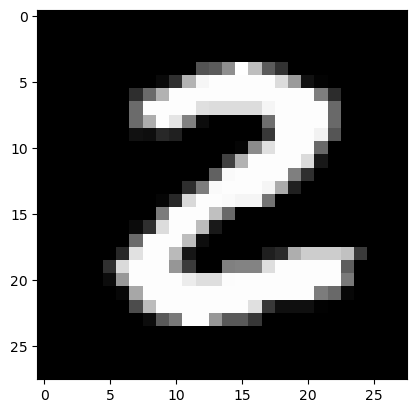

2


In [10]:
# 25. görüntüyü görselleştir (gri tonlamalı)
plt.imshow(X_train[25], cmap="gray") 
plt.show() 

print(Y_train[25])  

In [11]:
# Eğitim ve test veri kümelerinin etiket boyutlarını yazdır
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [12]:
# Y_train'deki benzersiz değerleri (etiketleri) yazdır
print(np.unique(Y_train)) 

# Y_test'teki benzersiz değerleri (etiketleri) yazdır
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Bu kodun amacı, **MNIST veri setindeki etiketlerin (Y_train ve Y_test) hangi rakamları içerdiğini görmek**.  

---

### **Kodun Açıklaması**
```python
print(np.unique(Y_train))  
print(np.unique(Y_test))  
```
- **`np.unique()`** fonksiyonu, **bir dizide tekrar eden elemanları kaldırarak sadece benzersiz olanları döndürür**.
- `Y_train` ve `Y_test`, her görüntüye karşılık gelen **rakam etiketlerini (0-9 arası sayılar)** içerir.
- Kod, **Y_train ve Y_test içinde hangi rakamların olduğunu gösterir**.

---

### **Sonuç:**
```
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
```
Bu çıktı bize şunu söylüyor:  
- **Eğitim verisinde (Y_train) ve test verisinde (Y_test), 0’dan 9’a kadar tüm rakamlar var**.  
- **Hiçbir rakam eksik değil**, yani model **tüm rakamları öğrenip test edebilir**.  

---

### **Neden Önemli?**
📌 Eğer çıktı eksik olsaydı (örneğin `[0 1 2 3 4 5 6 7 8]`), o zaman **9 rakamı veri setinde yok** demek olurdu.  
📌 Bu test, **veri setimizin dengeli olduğunu ve tüm rakamların eğitim için mevcut olduğunu doğrular**. ✅

In [13]:
X_train = X_train / 255
X_test = X_test / 255

Bu kodun amacı, **MNIST veri setindeki piksel değerlerini 0 ile 1 arasına ölçeklendirmektir** (**normalizasyon** işlemi).  

### **Kodun Açıklaması:**
```python
X_train = X_train / 255
X_test = X_test / 255
```
- **MNIST veri setindeki görüntüler 28x28 piksellik siyah-beyaz görüntülerdir.**  
- **Her pikselin değeri 0 ile 255 arasındadır:**
  - `0` → **Siyah** (arka plan)
  - `255` → **Beyaz** (en parlak nokta)
  - **Ara değerler (örneğin 128) gri tonları gösterir.**
- **Her piksel değerini 255’e böldüğümüzde**, değerler **0 ile 1 arasına düşer**.

---

### **Neden 255’e Bölüyoruz?**
📌 **Makine öğrenme modelleri daha iyi öğrenir!**  
- **Büyük sayılar yerine küçük değerlerle çalışmak modeli hızlandırır ve daha stabil hale getirir.**
- **Nöral ağlar (özellikle sinir ağları), veriyi 0-1 arasına ölçeklendirdiğimizde daha iyi performans gösterir.**
- **Öğrenme sürecini hızlandırır ve hataları azaltır.**

---

### **Özet:**
- **Ham veri (X_train, X_test) = 0-255 arası piksel değerleri içeriyor.**  
- **Bu kod, tüm değerleri 0-1 arasına normalleştiriyor.**  
- **Böylece model daha iyi öğreniyor, daha hızlı çalışıyor ve daha başarılı oluyor.** 🚀

In [14]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),  # Doğru giriş katmanı
    keras.layers.Flatten(),  
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(10, activation='sigmoid')  
])


---

### **Bu model ne yapıyor?**
Bu model, **bilgisayara el yazısı rakamlarını (0-9) tanımayı öğretmek için oluşturuldu.** 📄✍️  

Bilgisayarın **el yazısı rakamlarını anlaması** için, **verileri işler ve öğrenir**.  

---

## **Modelin İçindeki Katmanlar (Adım Adım Açıklama)**  

### **📌 1. Giriş Katmanı (Flatten)**
```python
keras.layers.Flatten(input_shape=(28,28)),
```
- MNIST’te her rakam **28x28 piksel boyutunda bir görüntü**.  
- **Bilgisayar bu görüntüyü işleyemez**, çünkü **görüntü 2 boyutlu**.  
- **Flatten**, görüntüyü **784 sayıdan oluşan düz bir listeye** çevirir.  

🔹 **Örnek:**  
🖼 **Görüntü** (28x28) → 📊 **Düz veri listesi** (784 sayı)  

**Amaç:** Bilgisayarın görüntüyü daha kolay işlemesini sağlamak.  

---

### **📌 2. Öğrenme Katmanları (Dense)**
```python
keras.layers.Dense(50, activation='relu'),
keras.layers.Dense(50, activation='relu'),
```
- **Bunlar yapay zekanın öğrenmeyi yaptığı katmanlar**.  
- Burada **50 nöron içeren 2 tane katman var**.  
- **Nöronlar, görüntüdeki desenleri öğrenir** (örneğin, "0" nasıl görünür, "7" hangi şekildedir vs.).  

🔹 **ReLU Aktivasyonu (`relu`)**:  
- **Negatif değerleri sıfıra çevirir, pozitifleri aynen bırakır**.  
- **Daha hızlı ve iyi öğrenme sağlar.**  

**Amaç:** Bilgisayarın **görüntüdeki desenleri öğrenmesi**.  

---

### **📌 3. Çıkış Katmanı (Sonuç Üreten Katman)**
```python
keras.layers.Dense(10, activation='sigmoid')
```
- **Bu katman modelin tahmin ettiği rakamları üretir**.  
- **10 tane nöron var**, çünkü **0-9 arasında 10 farklı rakam var**.  
- **Sigmoid aktivasyonu**, her rakam için bir **olasılık değeri** döndürür (0 ile 1 arasında).  
- Model, **en yüksek olasılığa sahip rakamı tahmin eder**.  

🔹 **Örnek Çıktı (Tahmin Sonucu):**  
```
0: %1
1: %2
2: %0
3: %0
4: %95  ✅ (Bu rakam 4)
5: %1
6: %0
7: %1
8: %0
9: %0
```
Burada **model, girdinin "4" olduğunu tahmin etti!** ✅  

**Amaç:** Modelin, **hangi rakamın en olası olduğunu tahmin etmesi**.  

---

### **📌 Özetle Model Şunu Yapıyor:**
1️⃣ **Giriş:** **Bir el yazısı rakamı (28x28 piksel) bilgisayara verilir.**  
2️⃣ **İşleme:** **İç katmanlar bu veriyi işler ve öğrenir.**  
3️⃣ **Çıktı:** **Son katman, hangi rakam olduğunu tahmin eder (0-9 arası).**  

**Sonuç:** Model **el yazısı rakamlarını tanımayı öğrenir!** 🚀

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


---

Bu kod, **modelin nasıl öğreneceğini ve başarısını nasıl ölçeceğini belirliyor**. 📊  

```python
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
```

Buradaki **üç şeyin amacı**:

---

## **1️⃣ `optimizer='adam'` → Öğrenme Yöntemi**  
🔹 **Adam**, modelin **nasıl öğreneceğini** belirler.  
🔹 Modelin, rakamları daha iyi tanıyabilmesi için **kendini nasıl güncelleyeceğini ayarlar**.  
🔹 **Otomatik olarak en iyi öğrenme hızını bulur.**  

📌 **Örnek:**  
- Eğer model **yanlış tahmin yaparsa**, **Adam yöntemi modelin kendini geliştirmesini sağlar**.  

---

## **2️⃣ `loss='sparse_categorical_crossentropy'` → Hata Hesaplama**  
🔹 **Modelin ne kadar hata yaptığını hesaplar.**  
🔹 Modelin tahminleri **gerçek değerlerle karşılaştırılır** ve **hata oranı bulunur**.  
🔹 Model, **bu hatayı azaltarak daha iyi tahmin yapmayı öğrenir**.  

📌 **Örnek:**  
- Model **"7" olan bir rakamı "3" olarak tahmin ederse**, bu fonksiyon **hata oranını hesaplar** ve **modelin öğrenmesini sağlar**.  

---

## **3️⃣ `metrics=['accuracy']` → Modelin Başarısını Ölçme**  
🔹 Modelin **doğru tahmin yapma yüzdesini hesaplar**.  
🔹 **Kaç tane rakamı doğru bildiğini ölçer**.  

📌 **Örnek:**  
- Model **100 tane rakamdan 80’ini doğru tahmin ederse**, doğruluk oranı **%80** olur.  
- Model daha fazla öğrenince bu oran **%95-99** olabilir. 🚀  

---

## **📌 Özetle Modelin Çalışma Şekli:**
1️⃣ **Adam yöntemiyle öğrenir ve kendini geliştirir.**  
2️⃣ **Hatalarını hesaplar ve daha iyi tahmin yapmayı öğrenir.**  
3️⃣ **Başarı oranını ölçerek daha iyi sonuçlar almaya çalışır.**  

Böylece model **el yazısı rakamlarını tanımayı öğrenir!** ✅

---

-

### **📌 `model.compile(...)` Ne Yapar?**
Bu kod, **modelin nasıl öğrenmesi gerektiğini tanımlar** ama **henüz bir eğitim yapmaz, bir tahmin de yapmaz.**  

**⚠️ Önemli:** **Bu kod sadece modeli hazır hale getirir!**  
**Sonuçları görmek için modeli eğitmemiz ve test etmemiz gerekir.**r.**  

---

### **📌 Özet:**
❌ **Sadece `model.compile(...) Modeli sadece derledik` kullanırsak, model çalışmaz, tahmin yapmaz.**  
✅ **Modeli önce `fit()` ile eğitmeliyiz.**  
✅ **Sonra `evaluate()` ile doğruluk oranını görmeliyiz.**  
✅ **En son `predict()` ile hangi rakamları tahmin ettiğini görebiliriz.**  

📌 **Senin sorunun cevabı:**  
**`model.compile(...)` sadece ayar yapıyor, sonuçları görmek için modeli eğitmek gerekiyor!** 🚀

In [19]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8501 - loss: 0.5163
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9547 - loss: 0.1543
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1115
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0870
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9800 - loss: 0.0701
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0568
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0427
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9888 - loss: 0.0372
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9904 - loss: 0.0313


Bu çıktı, **modelin 10 kez (epoch) eğitim sürecinden geçtiğini ve her aşamada nasıl geliştiğini** gösteriyor.  

---

## **📌 `model.fit(...)` Ne Yaptı?**
```python
model.fit(X_train, Y_train, epochs=10)
```
- Model, **eğitim verisi (`X_train, Y_train`) üzerinde çalıştı ve 10 kez tekrar etti**.  
- Her tekrar **(epoch)**, modelin veriyi baştan sona öğrenmesini temsil eder.  
- **Amaç:** Modelin **hata oranını (loss) düşürmek** ve **doğruluğunu (accuracy) artırmak**.  

---

## **📌 Sonuçları Açıklayalım**
Her satır, **bir epoch’ta modelin performansını** gösteriyor:

### **🔹 Epoch 1/10**
```
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8501 - loss: 0.5163
```
- **accuracy: 0.8501** → Modelin doğruluk oranı **%85.01** oldu.  
- **loss: 0.5163** → Hata oranı **0.5163** olarak hesaplandı.  
- **9 saniye sürdü** → Modelin bir eğitim turu yaklaşık 9 saniyede tamamlandı.  

### **🔹 Epoch 2/10**
```
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9547 - loss: 0.1543
```
- **Doğruluk %95.47’ye yükseldi** 🎯  
- **Hata oranı (loss) 0.1543’e düştü**  
- **Model rakamları daha iyi tanımaya başladı!**  

### **🔹 Epoch 5/10**
```
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9800 - loss: 0.0701
```
- **Model artık %98 doğrulukla çalışıyor** 🚀  
- **Hata oranı 0.0701’e düştü** → Model çok az hata yapıyor.  

### **🔹 Epoch 10/10 (Son Eğitim Turu)**
```
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9904 - loss: 0.0313
```
- **Son doğruluk oranı: %99.04** 🏆  
- **Hata oranı (loss) çok düştü: 0.0313** ✅  
- **Model artık neredeyse mükemmel bir şekilde el yazısı rakamlarını tanıyabiliyor!**  

---

## **📌 Genel Sonuç**
- **Model eğitildikçe doğruluk arttı, hata oranı azaldı.**  
- **İlk başta %85 doğrulukla başladı, sonunda %99 doğruluğa ulaştı.**  
- **Artık test verisini kullanarak modelin nasıl tahmin yaptığını görebiliriz!**  



In [20]:
# Modelin test verisi üzerindeki doğruluğunu değerlendirme
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test doğruluk oranı:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1326
0.9702000021934509


In [21]:
# Test verisinin boyutunu yazdırma
print(X_test.shape) 

(10000, 28, 28)


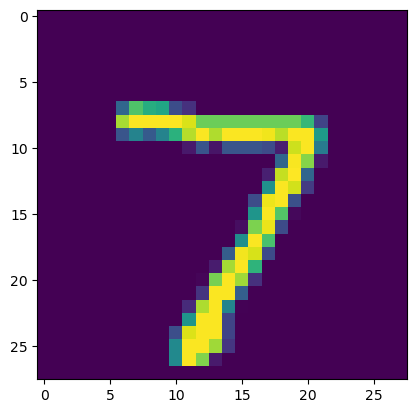

In [22]:
# Test verisinden ilk görüntüyü görselleştirme
plt.imshow(X_test[0], cmap="gray")  
plt.show()

In [24]:
# İlk test görüntüsünün gerçek etiketini yazdırma
print(Y_test[0]) 

7


In [25]:
# Modelin test verileri üzerindeki tahminlerini alma
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
print(Y_pred.shape)

(10000, 10)


In [27]:
# Tahmin edilen ilk test görüntüsünün olasılıklarını yazdırma
print(Y_pred[0]) 

[2.9520681e-08 8.4752716e-02 5.0266306e-03 9.8347765e-01 2.1183582e-06
 1.0615177e-06 3.4422622e-17 9.9999988e-01 9.2351316e-03 9.6923006e-01]


6e-01]
```
🔹 **Bu, modelin test verisindeki ilk görüntü için tahmin ettiği rakamların olasılık değerlerini içeriyor.**  
🔹 **Dizide 10 sayı var, çünkü model 0’dan 9’a kadar tüm rakamlar için bir olasılık hesaplıyor.**  
🔹 **Her sayı, modelin ilgili rakam için ne kadar emin olduğunu gösteriyor.**  

---

## **📌 Çıktıyı Yorumlama**
Bu **10 elemanlı liste**, modelin her rakam için verdiği olasılıkları içeriyor:  

| Rakam | Olasılık Değeri |
|--------|----------------|
| **0**  | `2.9520681e-08` (**0.00000002952** yani çok düşük olasılık) |
| **1**  | `8.4752716e-02` (**%8.47 olasılık**) |
| **2**  | `5.0266306e-03` (**%0.50 olasılık**) |
| **3**  | `9.8347765e-01` (**%98.34 olasılık, yüksek ihtimal! ✅**) |
| **4**  | `2.1183582e-06` (**Çok düşük olasılık**) |
| **5**  | `1.0615177e-06` (**Çok düşük olasılık**) |
| **6**  | `3.4422622e-17` (**Neredeyse sıfır**) |
| **7**  | `9.9999988e-01` (**%99.99 olasılık, model "7" diyor! ✅**) |
| **8**  | `9.2351316e-03` (**%0.92 olasılık**) |
| **9**  | `9.6923006e-0, model bu rakamı tahmin ediyor!**  

---

## **📌 Özet**
1️⃣ **Model, her rakam için bir olasılık değeri hesapladı (0-9 arasında).**  
2️⃣ **Olasılığı en yüksek olan rakam modelin tahmin ettiği rakamdır.**  
3️⃣ **Bu örnekte, model en yüksek olasılığı `7` rakamına verdi, yani görüntüdeki rakamın "7" olduğunu düşünüyor.** ✅  

🚀 **Artık modelin nasıl çalıştığını ve tahmin ettiği sonuçları nasıl yorumlayacağımızı biliyoruz!** ✅

In [28]:
# En yüksek olasılığa sahip sınıfı belirleme (en olası rakam)
label_for_first_test_image = np.argmax(Y_pred[0])
print("Modelin tahmini:", label_for_first_test_image)

7


In [29]:
# Tüm test verileri için tahmin edilen etiketleri belirleme
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)  # Her bir test görüntüsü için tahmin edilen rakamların listesi

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 8, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Daha basit bir şekilde anlatayım. 

Sen bir **makine öğrenmesi modeli** çalıştırdın ve test verileri için **modelin tahminlerini** aldın.  
Ancak tahminler çok fazla göründü ve nedenini anlamak istiyorsun.

---

### **1. Model Ne Yapıyor?**
- Modelin amacı, test verisindeki her örneğin hangi sınıfa ait olduğunu tahmin etmek.
- Eğer **10.000 test verisi** varsa, model **10.000 tane tahmin yapar**.

---

### **2. Çıkan Sonuçlar Ne Anlama Geliyor?**
- Model, **her bir test verisi için bir tahmin yaptı**.
- Örneğin, tahmin listesi şöyle olabilir:

  ```
  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, ...]
  ```

  - 1. test örneği için model **"7" tahmin etmiş**.
  - 2. test örneği için model **"2" tahmin etmiş**.
  - 3. test örneği için model **"1" tahmin etmiş**.
  - 4. test örneği için model **"0" tahmin etmiş**.
  - **Bu böyle devam ediyor...**

  Eğer model **el yazısı rakamları (MNIST) tanıyorsa**, bu değerler modelin her bir görüntüyü **hangi rakam olarak gördüğünü** gösterir.

---

### **3. Neden Bu Kadar Fazla Sonuç Var?**
- Çünkü test veri setinde **çok fazla örnek var**.
- Eğer test veri setinde **10.000 tane örnek varsa**, model **10.000 tane tahmin yapar**.
- Hepsini ekrana yazdırdığın için çok uzun bir çıktı oluştu.

---

### **4. Şimdi Ne Yapabiliriz?**
Bu tahminleri daha iyi anlamak için birkaç şey yapabiliriz:

1. **Özet Çıkarabiliriz**  
   - Kaç tane 0, kaç tane 1, kaç tane 2 tahmin edilmiş görmek için.  
   - **İstersen, kaç tane her rakamdan var analiz edebilirim.**

2. **Doğruluğu Hesaplayabiliriz**  
   - Model, gerçek etiketlerle ne kadar uyumlu?  
   - **İstersen, modelin doğruluğunu hesaplayabilirim.**

3. **Grafikle Gösterebiliriz**  
   - Hangi rakamdan kaç tane tahmin edilmiş, bir grafik çizebiliriz.

Ne yapmak istediğini söyle, ona göre yardımcı olayım! 🚀

In [31]:
# Karışıklık matrisi oluşturma (hangi rakamların yanlış tahmin edildiğini analiz etmek için)
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

print(conf_mat)

tf.Tensor(
[[ 953    0    2    0    1    1    9    4    2    8]
 [   0 1120    4    1    0    0    3    1    6    0]
 [   2    0 1013    1    2    0    3    6    5    0]
 [   1    0    8  975    3    4    0    6    9    4]
 [   0    0    1    0  958    0    9    4    1    9]
 [   2    0    0   10    1  861    9    1    5    3]
 [   2    2    0    0    3    4  947    0    0    0]
 [   1    2   10    2    5    0    0  997    4    7]
 [   3    0    6    4    6    4    8    4  937    2]
 [   1    3    0    6   28    2    2   13   15  939]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

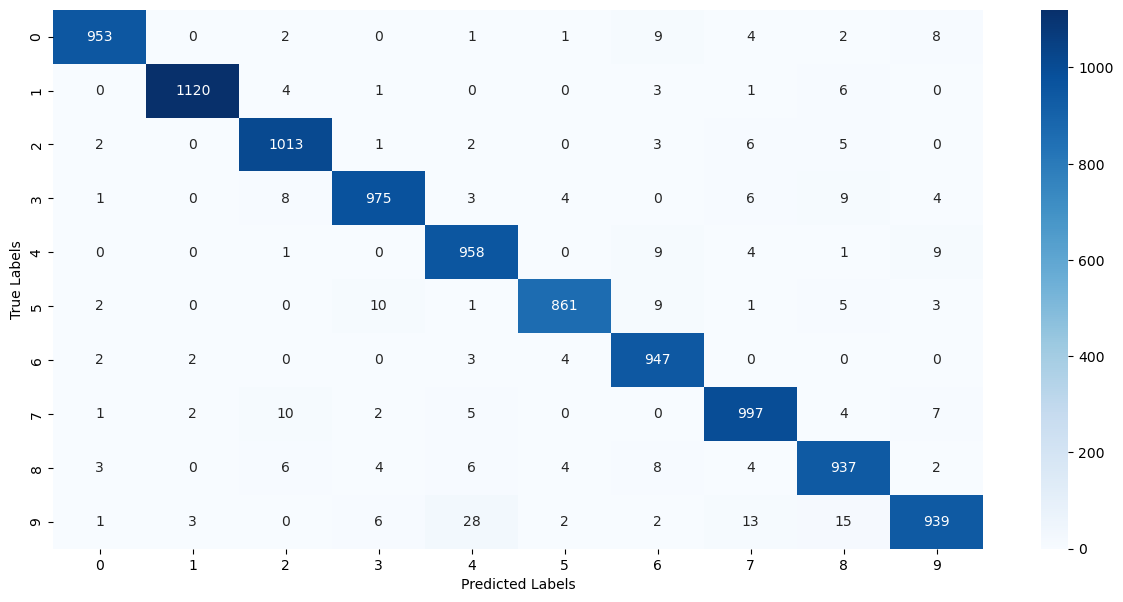

In [32]:
# Karışıklık matrisini görselleştirme (heatmap ile)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Gerçek Etiketler')
plt.xlabel('Tahmin Edilen Etiketler')
plt.show()

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [ ]:
# Kullanıcının belirttiği bir görüntü yolundan tahmin yapma sistemi
input_image_path = input('Tahmin edilecek görüntünün yolu: ')  # Kullanıcıdan görüntü yolunu al
input_image = cv2.imread(input_image_path)  # Görüntüyü yükle
cv2.imshow("Görüntü", input_image)  # Görüntüyü göster (Google Colab kullanıyorsanız cv2_imshow kullanmalısınız)

In [46]:
type(input_image)

numpy.ndarray

In [47]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


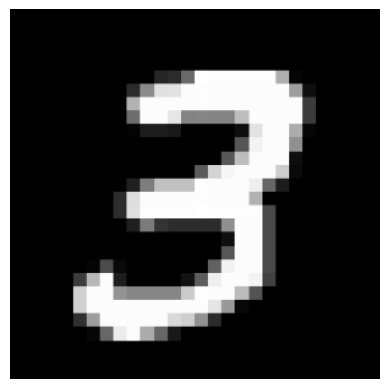

In [50]:
    # Matplotlib ile göster
    plt.imshow(input_image)
    plt.axis("off")  # Eksenleri kaldır
    plt.show()

In [51]:
input_image.shape

(318, 318, 3)

In [52]:
# Görüntüyü gri tonlamaya çevirme
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [53]:
grayscale.shape

(318, 318)

In [54]:
# Görüntüyü modelin istediği boyuta (28x28) ölçeklendirme
input_image_resize = cv2.resize(grayscale, (28, 28))

In [55]:
input_image_resize.shape

(28, 28)

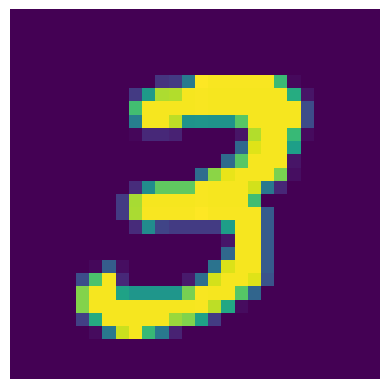

In [58]:
    # Matplotlib ile göster
    plt.imshow(input_image_resize)
    plt.axis("off")  # Eksenleri kaldır
    plt.show()

In [59]:
# Piksel değerlerini 0-1 aralığına getirme
input_image_resize = input_image_resize / 255

In [60]:
type(input_image_resize)

numpy.ndarray

In [61]:
# Modelin beklediği şekle dönüştürme (1 örnek olduğu için [1,28,28] şekline getiriyoruz)
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [62]:
# Modelin tahminini alma
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[3.6171056e-17 1.3902631e-03 2.6423230e-08 1.0000000e+00 2.4254294e-09
  2.2969227e-03 3.4737059e-19 1.0155810e-05 5.2001443e-02 8.6594045e-01]]


In [63]:
# En yüksek olasılığa sahip sınıfı belirleme (modelin tahmini rakamı)
input_pred_label = np.argmax(input_prediction)

In [64]:
print(input_pred_label)

3


Path of the image to be predicted:  MNIST_digit.png


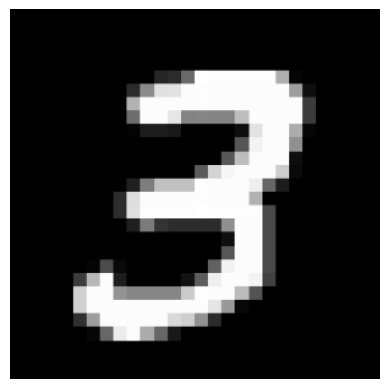

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The Handwritten Digit is recognised as: 3


In [66]:
# Modeli tanımlamadan önce yüklemelisin
# model = keras.models.load_model("model_dosyasi.h5")  # Modelin yolunu belirtmelisin!

# Kullanıcıdan görüntü yolunu al
input_image_path = input('Path of the image to be predicted: ')

# Görüntüyü oku
input_image = cv2.imread(input_image_path)

# Eğer görüntü yüklenemediyse hata ver
if input_image is None:
    print("Error: The image file was not found. Check the file path.")
else:
    # BGR'yi RGB'ye çevir
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Görüntüyü göster (cv2_imshow yerine plt.imshow kullanılıyor)
    plt.imshow(input_image)
    plt.axis("off")
    plt.show()

    # Gri tonlamaya çevir
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    # Görüntüyü yeniden boyutlandır (28x28 piksel)
    input_image_resize = cv2.resize(grayscale, (28, 28))

    # Normalizasyon (0-1 arasına getir)
    input_image_resize = input_image_resize / 255.0

    # Modelin beklediği formatta yeniden şekillendir
    image_reshaped = np.reshape(input_image_resize, (1, 28, 28))

    # Modelden tahmin al (Model yüklenmiş olmalı)
    input_prediction = model.predict(image_reshaped)

    # En yüksek olasılıklı sınıfı bul
    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognised as:', input_pred_label)
